In [94]:
import os
import urllib.request
import csv
import pandas as pd
import json as js
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
# API Connection Settings

In [96]:
apikey = "4d4d3341e1a5b5561eb35dbb0a2bb095"
lat = "-122.4233"
lng = "37.8267"
url = "https://api.darksky.net/forecast/"+ apikey+"/"+lng+","+lat

In [97]:
### Read Raw Weather Data from Source

In [98]:
response = urllib.request.urlopen(url)
httpdata = response.read().decode()
newdata = js.loads(httpdata)
jsdata =newdata['hourly']['data']
# Display raw data from the url source
print(httpdata)

{"latitude":37.8267,"longitude":-122.4233,"timezone":"America/Los_Angeles","currently":{"time":1553544800,"summary":"Overcast","icon":"cloudy","nearestStormDistance":0,"precipIntensity":0.002,"precipIntensityError":0,"precipProbability":0.74,"precipType":"rain","temperature":54.8,"apparentTemperature":54.8,"dewPoint":46.2,"humidity":0.73,"pressure":1017.59,"windSpeed":11.8,"windGust":26.45,"windBearing":188,"cloudCover":1,"uvIndex":3,"visibility":3.77,"ozone":370.4},"minutely":{"summary":"Drizzle starting in 55 min.","icon":"rain","data":[{"time":1553544780,"precipIntensity":0.002,"precipIntensityError":0,"precipProbability":0.81,"precipType":"rain"},{"time":1553544840,"precipIntensity":0.002,"precipIntensityError":0,"precipProbability":0.59,"precipType":"rain"},{"time":1553544900,"precipIntensity":0.002,"precipIntensityError":0,"precipProbability":0.24,"precipType":"rain"},{"time":1553544960,"precipIntensity":0.002,"precipIntensityError":0,"precipProbability":0.04,"precipType":"rain"}

In [99]:
### save converted hourly json data to csv file for analysis

In [100]:
def write_to_csv(jsondata):
    newjsdata = jsondata   
    print(newjsdata)
    f = csv.writer(open("test.csv", "w"))
    f.writerow(['time', 'summary', 'icon', 'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex', 'visibility', 'ozone'])
    for p in newjsdata:
        f.writerow([p['time'], p['summary'], p['icon'], 
                    p['precipIntensity'], p['precipProbability'], p['temperature'], p['apparentTemperature'], 
                    p['dewPoint'], p['humidity'], p['pressure'], p['windSpeed'], p['windGust'], p['windBearing'], 
                    p['cloudCover'], p['uvIndex'], p['visibility'], p['ozone']])
    

In [101]:
write_to_csv(jsdata)

[{'time': 1553544000, 'summary': 'Light Rain', 'icon': 'rain', 'precipIntensity': 0.0109, 'precipProbability': 0.81, 'precipType': 'rain', 'temperature': 54.97, 'apparentTemperature': 54.97, 'dewPoint': 45.86, 'humidity': 0.71, 'pressure': 1017.59, 'windSpeed': 11.91, 'windGust': 26.53, 'windBearing': 188, 'cloudCover': 0.98, 'uvIndex': 3, 'visibility': 4.05, 'ozone': 370.18}, {'time': 1553547600, 'summary': 'Overcast', 'icon': 'cloudy', 'precipIntensity': 0.0117, 'precipProbability': 0.6, 'precipType': 'rain', 'temperature': 54.19, 'apparentTemperature': 54.19, 'dewPoint': 47.33, 'humidity': 0.78, 'pressure': 1017.58, 'windSpeed': 11.46, 'windGust': 26.15, 'windBearing': 190, 'cloudCover': 1, 'uvIndex': 3, 'visibility': 2.75, 'ozone': 371.16}, {'time': 1553551200, 'summary': 'Light Rain', 'icon': 'rain', 'precipIntensity': 0.0359, 'precipProbability': 0.52, 'precipType': 'rain', 'temperature': 54.35, 'apparentTemperature': 54.35, 'dewPoint': 50.16, 'humidity': 0.86, 'pressure': 1017.8

In [102]:
loaded_data = pd.read_csv("test.csv")
sample_data=loaded_data[['time', 'precipIntensity', 'temperature', 'humidity', 'pressure', 'windSpeed']]
sample_data=sample_data.sort_values(by=['time']) # reorder the data by date 

In [103]:
sample_data[:10]

,time,precipIntensity,temperature,humidity,pressure,windSpeed
0,1553544000,0.0109,54.97,0.71,1017.59,11.91
1,1553547600,0.0117,54.19,0.78,1017.58,11.46
2,1553551200,0.0359,54.35,0.86,1017.85,12.04
3,1553554800,0.0503,54.00,0.91,1018.26,10.42
4,1553558400,0.0207,53.35,0.89,1018.27,8.18
5,1553562000,0.0122,53.25,0.87,1018.12,6.33
6,1553565600,0.0062,53.37,0.86,1018.06,4.67
7,1553569200,0.0019,53.09,0.86,1018.05,4.02
8,1553572800,0.0033,52.97,0.86,1018.55,3.19
9,1553576400,0.0040,53.14,0.84,1019.27,3.48


In [104]:
### Check for null data

In [105]:
sample_data.isnull().sum()

time               0
precipIntensity    0
temperature        0
humidity           0
pressure           0
windSpeed          0
dtype: int64

In [106]:
### Perform data analysis on the data

In [107]:
avg_daily = sample_data.groupby(['time']).mean() #create a new DF based on the mean of the above data
print(avg_daily[0:5])

            precipIntensity  temperature  humidity  pressure  windSpeed
time                                                                   
1553544000           0.0109        54.97      0.71   1017.59      11.91
1553547600           0.0117        54.19      0.78   1017.58      11.46
1553551200           0.0359        54.35      0.86   1017.85      12.04
1553554800           0.0503        54.00      0.91   1018.26      10.42
1553558400           0.0207        53.35      0.89   1018.27       8.18


In [108]:
print("Descriptive Stats:\n")
print(avg_daily.describe())

Descriptive Stats:

       precipIntensity  temperature   humidity     pressure  windSpeed
count        49.000000    49.000000  49.000000    49.000000  49.000000
mean          0.008916    54.391429   0.804898  1016.150612   7.642449
std           0.009787     2.433444   0.085028     2.369987   4.448560
min           0.000400    50.080000   0.600000  1011.850000   2.490000
25%           0.002700    53.090000   0.770000  1013.880000   3.480000
50%           0.005300    54.350000   0.840000  1017.440000   6.220000
75%           0.012200    55.260000   0.860000  1018.070000  11.910000
max           0.050300    59.850000   0.910000  1019.760000  15.630000


In [109]:
### Grapical representation of the data

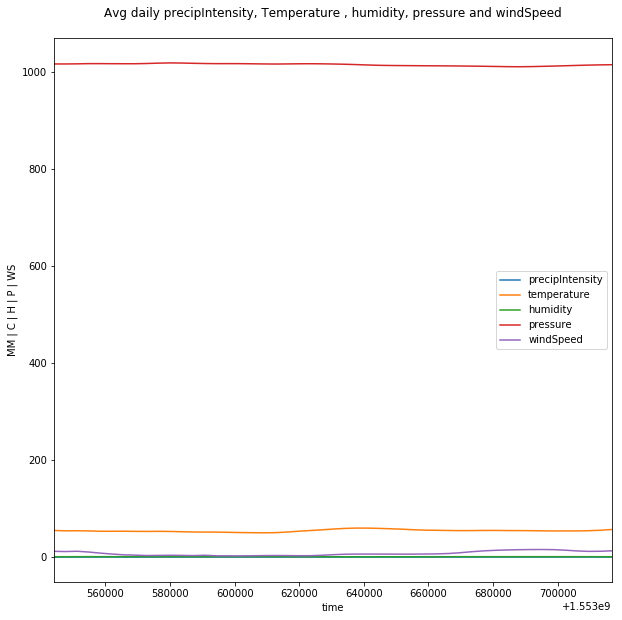

In [132]:
avg_daily.plot(figsize=(10, 10))
plt.title("Avg daily precipIntensity, Temperature , humidity, pressure and windSpeed\n")
plt.ylabel("MM | C | H | P | WS")
plt.xlabel("time")
plt.show()

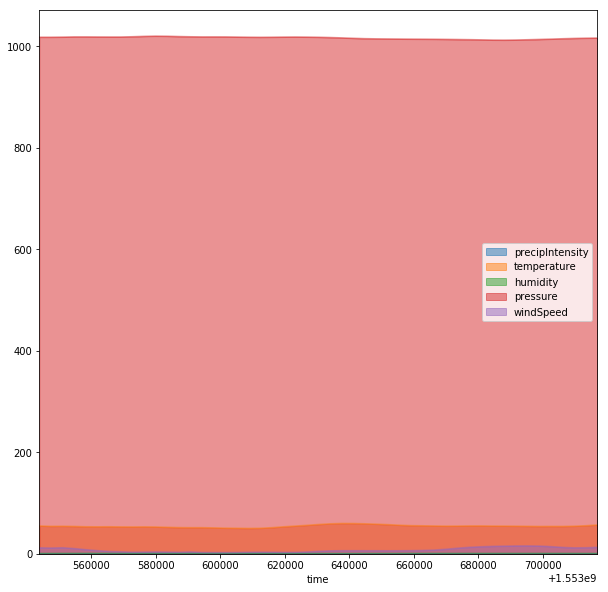

In [133]:
avg_daily.plot.area(stacked=False, figsize=(10, 10))

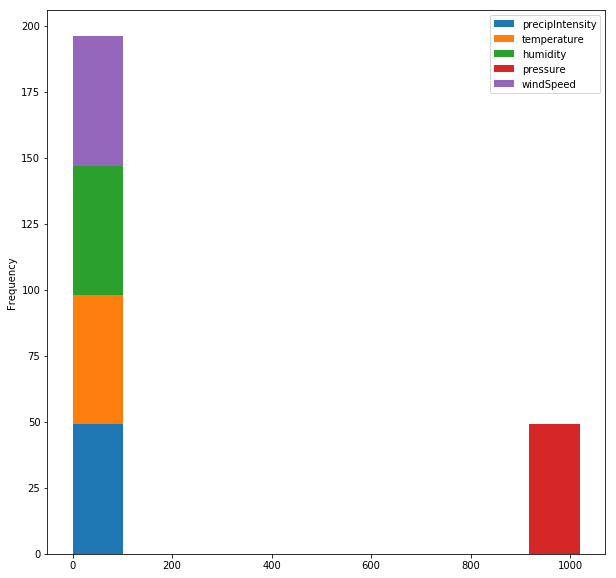

In [134]:
avg_daily.plot.hist(stacked=True, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a275fa898>,
      dtype=object)

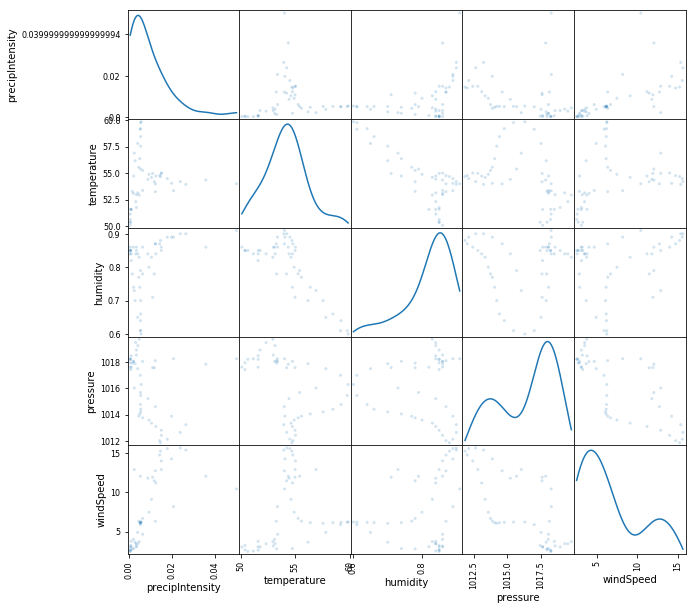

In [135]:
from pandas.plotting import scatter_matrix
scatter_matrix(avg_daily, alpha=0.2, figsize=(10, 10), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27d7b2b0>,
      dtype=object)

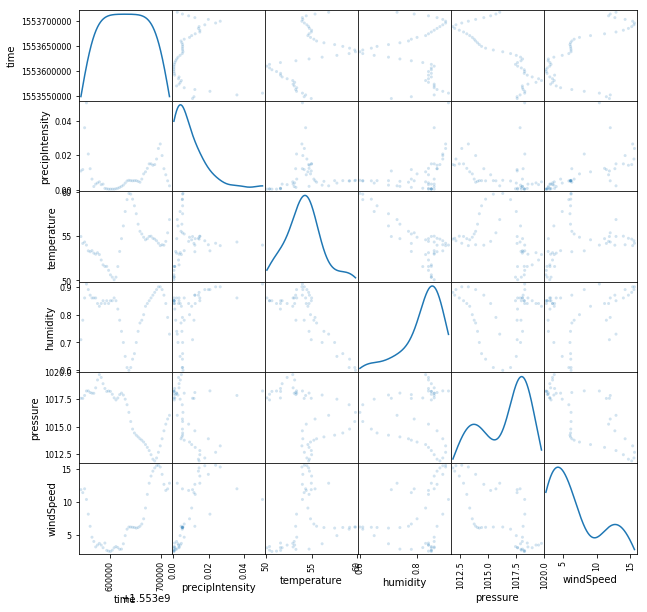

In [136]:
from pandas.plotting import scatter_matrix
scatter_matrix(sample_data, alpha=0.2, figsize=(10, 10), diagonal='kde')